# Reading in CSV

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

listings_file = "listings.csv"
# Read in dataframe
listings_df = pd.read_csv(listings_file)
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,11/4/2019,0.34,3,308
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,79,1,403,5/4/2021,5.16,1,208
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,6/5/2016,0.56,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,21,1,1/2/2014,0.01,1,134
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,61,2,474,9/25/2020,3.61,1,246


# Cleaning up the dataframe

Certain air bnbs in the csv file have prices listed as 0 
This makes no sense so we are removing these values

In [2]:
listings_df = listings_df.loc[listings_df["price"]!=0]

# Percentage of Listings by Neighborhood

In [3]:
# Here I want to get a list of the group neighbourhoods
large_neighborhoods_list = listings_df["neighbourhood_group"].unique()
total_listings = len(listings_df)

In [4]:
# Now that I have a list of the group neighbourhoods I am going to find the percentage of listings for each
neighborhood_counts = listings_df["neighbourhood_group"].value_counts()
neighborhood_df = pd.DataFrame({"Total Listings": neighborhood_counts,
                                "Percentage of listings": ((neighborhood_counts/total_listings)*100).map("{:.2f}%".format)})
neighborhood_df

,Total Listings,Percentage of listings
Manhattan,15872,43.85%
Brooklyn,14234,39.33%
Queens,4785,13.22%
Bronx,1002,2.77%
Staten Island,299,0.83%


In [5]:
# Extract neighborhood names and Total Listings from dataframe
group_names = neighborhood_df.index
total_n_listings =[]
for x in range(len(neighborhood_df)):
    total_n_listings.append(neighborhood_df["Total Listings"][x])

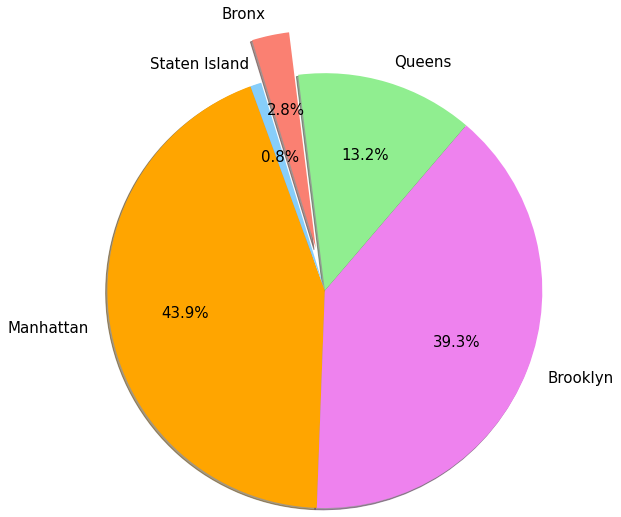

In [14]:
# Create a pi chart for the listing percentages per neighborhood 
labels = group_names
explode = (0, 0, 0, 0.5, 0)

colors = ["orange", "violet", "lightgreen", "salmon","lightskyblue"]

plt.pie(total_n_listings, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=110, radius =2.5, pctdistance=0.65, textprops={'fontsize': 15}, colors=colors)
plt.show()

# Neighborhood Group Price Statistics

In [18]:
# Perform some calculations on the listing price by neighborhood 
neighborhood_group_df = listings_df.groupby(["neighbourhood_group"])
avg_price = neighborhood_group_df["price"].mean()
max_price = neighborhood_group_df["price"].max()
min_price = neighborhood_group_df["price"].min()

# Create a dataframe and add values to it
neighboorhood_prices_df = pd.DataFrame(avg_price)
neighboorhood_prices_df["Max Price"] = max_price.map("${:.2f}".format)
neighboorhood_prices_df["Min Price"] = min_price.map("${:.2f}".format)

# Sort by average price
neighbor_sorted_prices = neighboorhood_prices_df.sort_values("price",ascending=False)
neighbor_sorted_prices

,price,Max Price,Min Price
neighbourhood_group,,,
Manhattan,202.314957,$10000.00,$10.00
Brooklyn,128.820430,$10000.00,$10.00
Staten Island,112.438127,$1200.00,$24.00
Queens,106.753396,$10000.00,$10.00
Bronx,100.597804,$2000.00,$11.00


In [21]:
#Extract neighbourhood names and average price from the dataframge
group2_names = neighbor_sorted_prices.index

avg_list_price = []
for x in range(len(group2_names)):
    avg_list_price.append(neighbor_sorted_prices["price"][x])

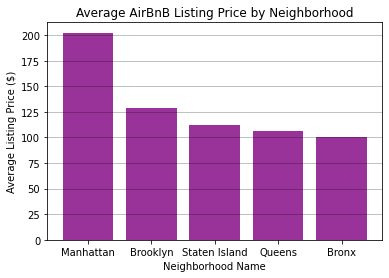

In [28]:
# Create bar graph for avg prices 
x_axis = np.arange(len(group2_names))
plt.bar(x_axis, avg_list_price, color ="purple", alpha=0.8, align="center")
plt.xticks(x_axis, group2_names)
plt.title("Average AirBnB Listing Price by Neighborhood")
plt.xlabel("Neighborhood Name")
plt.ylabel("Average Listing Price ($)")

plt.grid(axis = 'y', alpha= 0.3, color = "black")
plt.show()

# Deeper Dive into Manhattan

In [29]:
# Create a dataframe for with only Manhattan
manhattan_df = listings_df.loc[listings_df["neighbourhood_group"]=="Manhattan"]

In [33]:
# Now I want to get a list of the neighborhoods in Manhattan
manhattan_neighborhoods = manhattan_df["neighbourhood"].unique()
total_manhattan_l = len(manhattan_df)

manhattan_neighbor_counts = manhattan_df["neighbourhood"].value_counts()
manhattan_neighbor_df = pd.DataFrame({"Total Listings": manhattan_neighbor_counts,
                                      "Percentage of listings": ((manhattan_neighbor_counts/total_manhattan_l)*100).map("{:.2f}%".format)})
manhattan_neighbor_df

,Total Listings,Percentage of listings
Harlem,1931,12.17%
Upper West Side,1453,9.15%
Hell's Kitchen,1449,9.13%
Midtown,1338,8.43%
Upper East Side,1328,8.37%
East Village,1195,7.53%
Chelsea,815,5.13%
East Harlem,717,4.52%
Lower East Side,700,4.41%
Washington Heights,605,3.81%


In [34]:
# Create a dataframe for neighborhoods within Manhattan

manhattan_grouped_df = manhattan_df.groupby(["neighbourhood"])
avg_manh_price = manhattan_grouped_df["price"].mean()
max_manh_price = manhattan_grouped_df["price"].max()
min_manh_price = manhattan_grouped_df["price"].min()

manhattan_prices_df = pd.DataFrame(avg_manh_price)
manhattan_prices_df["Max Price"] = max_manh_price.map("${:.2f}".format)
manhattan_prices_df["Min Price"] = min_manh_price.map("${:.2f}".format)

# Sort by average price
manhattan_sorted_prices = manhattan_prices_df.sort_values("price",ascending=False)
manhattan_sorted_prices

,price,Max Price,Min Price
neighbourhood,,,
Tribeca,444.761628,$6500.00,$42.00
Flatiron District,371.178082,$2800.00,$48.00
Theater District,304.847222,$3000.00,$34.00
Midtown,276.266069,$10000.00,$39.00
Greenwich Village,271.638889,$6000.00,$31.00
SoHo,268.252874,$1600.00,$39.00
Chelsea,255.500613,$3557.00,$10.00
Lower East Side,252.618571,$10000.00,$26.00
West Village,249.103131,$4000.00,$15.00
